<a href="https://colab.research.google.com/github/Zncl2222/DeepLearning_Practice/blob/main/DeepLearning_Practice_FashionMNIST(CNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.layers import Dense,Conv2D,Flatten,BatchNormalization,Dropout,MaxPool2D
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
train_images=train_images/255
test_images=test_images/255

train_labels=to_categorical(train_labels,10)
test_labels=to_categorical(test_labels,10)


In [ ]:
print(train_images.shape)
print(train_labels.shape)

(60000, 28, 28)
(60000, 10)


In [ ]:
model=Sequential()

model.add(Conv2D(32,(3,3),activation='relu',padding='same',input_shape=(28,28,1)))
model.add(Conv2D(32,(3,3),activation='relu',padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(32,(3,3),activation='relu',padding='same'))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512,activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(10,activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=0.001),metrics=['acc'])

In [ ]:
history=model.fit(train_images,train_labels,batch_size=128,epochs=20,validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 10s 26ms/step - loss: 0.5665 - acc: 0.7935 - val_loss: 0.3436 - val_acc: 0.8717
Epoch 2/20
375/375 [==============================] - 9s 25ms/step - loss: 0.3440 - acc: 0.8737 - val_loss: 0.2822 - val_acc: 0.8987
Epoch 3/20
375/375 [==============================] - 9s 25ms/step - loss: 0.2898 - acc: 0.8933 - val_loss: 0.2578 - val_acc: 0.9082
Epoch 4/20
375/375 [==============================] - 9s 25ms/step - loss: 0.2561 - acc: 0.9061 - val_loss: 0.2302 - val_acc: 0.9168
Epoch 5/20
375/375 [==============================] - 10s 27ms/step - loss: 0.2348 - acc: 0.9133 - val_loss: 0.2143 - val_acc: 0.9238
Epoch 6/20
375/375 [==============================] - 9s 25ms/step - loss: 0.2185 - acc: 0.9194 - val_loss: 0.2092 - val_acc: 0.9237
Epoch 7/20
375/375 [==============================] - 10s 27ms/step - loss: 0.2065 - acc: 0.9234 - val_loss: 0.1994 - val_acc: 0.9259
Epoch 8/20
375/375 [==============================] - 9s 25ms/step

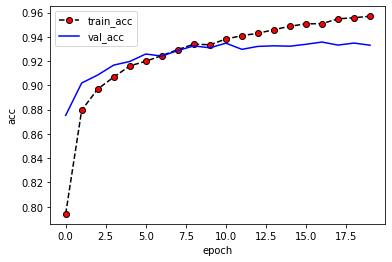

In [ ]:
plt.plot(history.history['acc'],label='train_acc',marker='o',linestyle='--',color='k',markeredgecolor='k',markerfacecolor='r')
plt.plot(history.history['val_acc'],label='val_acc',color='b')

plt.xlabel('epoch')
plt.ylabel('acc')
plt.legend(loc='best')
plt.show()

In [ ]:
test_loss,test_acc=model.evaluate(test_images,test_labels)
print('loss:{:.3f}\nacc: {:.3f}'.format(test_loss,test_acc))

test_ans=np.argmax(test_labels[:10],axis=1)
print(test_ans)

test_predictions=model.predict(test_images[:10])
test_predictions=np.argmax(test_predictions,axis=1)

print(test_predictions)

313/313 [==============================] - 17s 55ms/step - loss: 0.2156 - acc: 0.9298
loss:0.216
acc: 0.930
[9 2 1 1 6 1 4 6 5 7]
[9 2 1 1 0 1 4 6 5 7]


In [ ]:
model2=Sequential()

model2.add(Conv2D(32,(3,3),activation='relu',padding='same',input_shape=(28,28,1)))
model2.add(Conv2D(32,(3,3),activation='relu',padding='same'))
model2.add(MaxPool2D(pool_size=(2,2)))
model2.add(Dropout(0.25))

model2.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model2.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model2.add(MaxPool2D(pool_size=(2,2)))
model2.add(Dropout(0.25))

model2.add(Flatten())
model2.add(Dense(512,activation='relu'))
model2.add(Dropout(0.25))

model2.add(Dense(10,activation='softmax'))

model2.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=0.001),metrics=['acc'])

history2=model2.fit(train_images,train_labels,batch_size=128,epochs=20,validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 276s 733ms/step - loss: 0.4976 - acc: 0.8175 - val_loss: 0.3122 - val_acc: 0.8861
Epoch 2/20
375/375 [==============================] - 273s 727ms/step - loss: 0.2935 - acc: 0.8923 - val_loss: 0.3008 - val_acc: 0.8903
Epoch 3/20
375/375 [==============================] - 272s 726ms/step - loss: 0.2481 - acc: 0.9095 - val_loss: 0.2209 - val_acc: 0.9188
Epoch 4/20
375/375 [==============================] - 270s 721ms/step - loss: 0.2195 - acc: 0.9178 - val_loss: 0.2219 - val_acc: 0.9197
Epoch 5/20
375/375 [==============================] - 271s 722ms/step - loss: 0.1952 - acc: 0.9277 - val_loss: 0.1980 - val_acc: 0.9297
Epoch 6/20
375/375 [==============================] - 270s 720ms/step - loss: 0.1773 - acc: 0.9334 - val_loss: 0.1905 - val_acc: 0.9331
Epoch 7/20
375/375 [==============================] - 270s 721ms/step - loss: 0.1624 - acc: 0.9389 - val_loss: 0.1921 - val_acc: 0.9301
Epoch 8/20
375/375 [============================

In [ ]:
plt.plot(history.history['acc'],label='train_acc')
plt.plot(history.history['val_acc'],label='val_acc')

plt.xlabel('epoch')
plt.ylabel('acc')

plt.legend(loc='best')
plt.show()

In [ ]:
test_loss,test_acc2=model2.evaluate(test_images,test_labels)
print('loss:{:.3f}\nacc: {:.3f}'.format(test_loss,test_acc))

test_ans2=np.argmax(test_labels[:10],axis=1)
print(test_ans2)

test_predictions2=model2.predict(test_images[:10])
test_predictions2=np.argmax(test_predictions2,axis=1)

print(test_predictions2)

313/313 [==============================] - 17s 54ms/step - loss: 0.2672 - acc: 0.9301
loss:0.267
acc: 0.930
[9 2 1 1 6 1 4 6 5 7]
[9 2 1 1 0 1 4 6 5 7]
